In [1]:
import numpy as np
from numerical_methods.linear_iter_methods import jacobi, gauss_seidel, sor


# Part 1


In [2]:
A = np.array([[4, 1, -1], [-1, 3, 1], [2, 2, 6]])
b = np.array([[5, -4, 1]]).T
x0 = np.zeros(shape=b.shape)
A, b

(array([[ 4,  1, -1],
        [-1,  3,  1],
        [ 2,  2,  6]]),
 array([[ 5],
        [-4],
        [ 1]]))

In [3]:
jacobi(A, b, x0, max_iter=3)

array([[ 1.54166667],
       [-0.85648148],
       [-0.05092593]])

In [4]:
gauss_seidel(A, b, x0, max_iter=3)

array([[ 1.45196759],
       [-0.83391204],
       [-0.03935185]])

In [5]:
sor(A, b, x0, w=1.1, max_iter=3)

array([[ 1.43231701],
       [-0.83290758],
       [-0.02942417]])

In [6]:
sor(A, b, x0, w=0.9, max_iter=3)

array([[ 1.46285388],
       [-0.8439338 ],
       [-0.03719093]])

# Part 2


In [7]:
import time
from functools import partial
import pandas as pd


def generate_random(n):
    A = (n / 2) * np.eye(n) + np.random.rand(n, n) / 2
    b = np.random.normal(size=(n, 1))
    
    return A, b

In [8]:
def sor11(*args, **kwargs):
    return sor(*args, w=1.1, **kwargs)


def sor09(*args, **kwargs):
    return sor(*args, w=0.9, **kwargs)


methods = [jacobi, gauss_seidel, sor11, sor09]
ns = [10, 25, 50, 100, 200, 500]

# init
time_dict = {"n": ns}
iter_dict = {"n": ns}
for f in methods:
    time_dict[f.__name__] = []
    iter_dict[f.__name__] = []

for n in ns:
    A, b = generate_random(n)
    x0 = np.zeros(shape=b.shape)
    results = {"err": [], "iter": []}
    for f in methods:
        start = time.time()
        x, it = f(A, b, x0, max_iter=10000, return_iter=True)
        time_dict[f.__name__].append(time.time() - start)
        iter_dict[f.__name__].append(it)

time_df = pd.DataFrame(time_dict)
iter_df = pd.DataFrame(iter_dict)

In [9]:
time_df

,n,jacobi,gauss_seidel,sor11,sor09
0,10,0.001299,0.000462,0.000793,0.000719
1,25,0.003124,0.001265,0.001959,0.001510
2,50,0.003584,0.001467,0.002836,0.002382
3,100,0.007555,0.002838,0.005517,0.004568
4,200,0.011452,0.005687,0.010043,0.009131
5,500,0.035739,0.014582,0.025603,0.023335


<AxesSubplot:title={'center':'Execution Time for Different Methods'}, xlabel='n', ylabel='sec'>

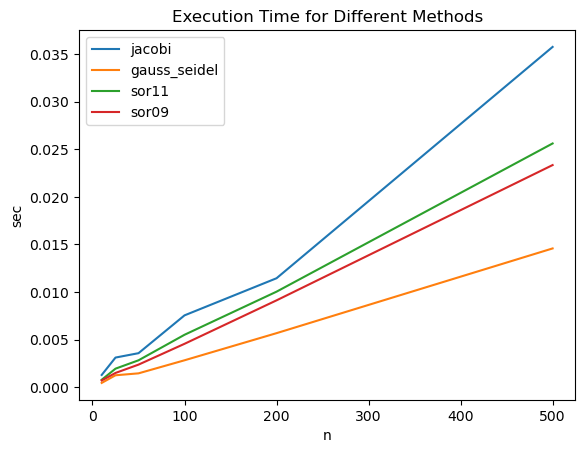

In [10]:
time_df.plot(
    x="n",
    title="Execution Time for Different Methods",
    legend=True,
    ylabel="sec",
)

In [11]:
iter_df

,n,jacobi,gauss_seidel,sor11,sor09
0,10,19,8,11,10
1,25,24,8,12,9
2,50,21,8,11,9
3,100,23,8,11,9
4,200,17,8,10,9
5,500,21,8,10,9


<AxesSubplot:title={'center':'#Iteration to Converge for Different Methods'}, xlabel='n', ylabel='iteration'>

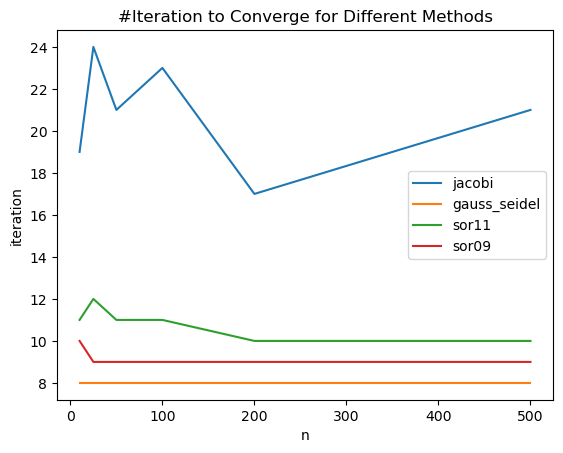

In [12]:
iter_df.plot(
    x="n",
    title="#Iteration to Converge for Different Methods",
    legend=True,
    ylabel="iteration",
)

In [13]:
A, b = generate_random(500)
err_dict = {}

for f in methods:
    xk = np.zeros(shape=b.shape)
    err_dict[f.__name__] = []
    for i in range(10):
        xk = f(A, b, xk, max_iter=1)
        err = np.linalg.norm(A @ xk - b, ord=2)
        err_dict[f.__name__].append(err)
err_df = pd.DataFrame(err_dict)
err_df

,jacobi,gauss_seidel,sor11,sor09
0,0.434004,3.475615e-01,2.219902e+00,2.220348e+00
1,0.163752,5.717918e-02,2.509180e-01,2.253029e-01
2,0.081658,6.187188e-03,3.721034e-02,2.313929e-02
3,0.040731,4.029491e-04,5.951112e-03,2.378620e-03
4,0.020317,7.015569e-05,8.105189e-04,2.466570e-04
5,0.010134,6.607047e-06,1.389324e-04,2.585864e-05
6,0.005055,5.717533e-07,3.502483e-05,2.708203e-06
7,0.002521,6.555298e-09,6.843784e-06,2.822048e-07
8,0.001258,8.760399e-10,1.007819e-06,3.147498e-09
9,0.000627,1.057167e-10,5.454786e-08,3.346670e-10


<AxesSubplot:title={'center':'error verse iteration number for each method for n = 500'}, xlabel='iteration', ylabel='error'>

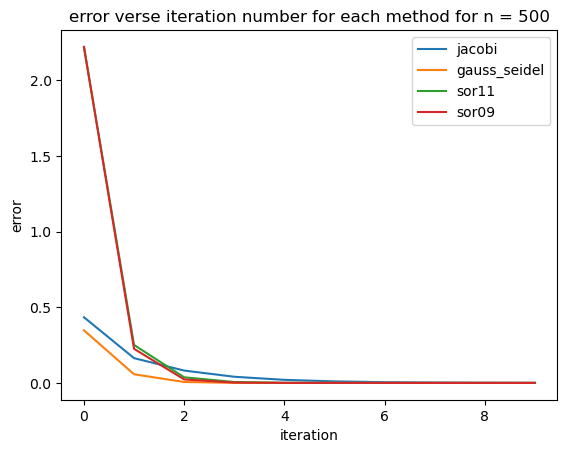

In [14]:
err_df.plot(
    title="error verse iteration number for each method for n = 500",
    legend=True,
    xlabel="iteration",
    ylabel="error",
)